In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

df = pd.read_csv("../data/raw/Electric_Vehicle_Population_Data.csv")

print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

print("\nDataset Overview:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset loaded with 235692 rows and 17 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric

In [23]:
def clean_data(df):
    cleaned_df = df.copy()
    cleaned_df['CAFV_Class'] = cleaned_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: 1 if x == 'Clean Alternative Fuel Vehicle Eligible' else 0)
    cleaned_df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1, inplace=True)

    cleaned_df['Electric Range'] = cleaned_df['Electric Range'].replace(0, np.nan)
    cleaned_df['Electric Range'].fillna(cleaned_df['Electric Range'].median(), inplace=True)

    current_year = 2025
    cleaned_df['Vehicle_Age'] = current_year - cleaned_df['Model Year']

    if 'Base MSRP' in cleaned_df.columns:
        cleaned_df['Base MSRP'] = cleaned_df['Base MSRP'].replace(0, np.nan)
        cleaned_df['Base MSRP'].fillna(cleaned_df['Base MSRP'].median(), inplace=True)
    
    cleaned_df['longitude'] = cleaned_df['Vehicle Location'].str.extract(r'POINT \(([-\d\.]+) ').astype(float)
    cleaned_df['latitude'] = cleaned_df['Vehicle Location'].str.extract(r' ([-\d\.]+)\)').astype(float)

    cleaned_df = cleaned_df.dropna()

    return cleaned_df

In [24]:
print("\nCleaning data...")
cleaned_df = clean_data(df)

print(f"Cleaned dataset has {cleaned_df.shape[0]} rows and {cleaned_df.shape[1]} columns")
print("\nMissing values after cleaning:")
print(cleaned_df.isnull().sum())

output_path = "../data/Electric_Vehicle_Population_Data_cleaned.parquet"


cleaned_df.to_parquet(output_path, index=False, engine='pyarrow')

print(f"\nCleaned dataset saved as: {output_path}")

print("\nSample of cleaned dataset:")
print(cleaned_df.head())

print("\nColumn descriptions:")
for col in cleaned_df.columns:
    print(f"- {col}: {cleaned_df[col].dtype}")

print("\nData preparation complete!")


Cleaning data...


/var/folders/t5/mxgw5t8j2236t033_3djvdgh0000gn/T/ipykernel_58662/3677829469.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Electric Range'].fillna(cleaned_df['Electric Range'].median(), inplace=True)
/var/folders/t5/mxgw5t8j2236t033_3djvdgh0000gn/T/ipykernel_58662/3677829469.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

Cleaned dataset has 235191 rows and 20 columns

Missing values after cleaning:
VIN (1-10)               0
County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Vehicle Location         0
Electric Utility         0
2020 Census Tract        0
CAFV_Class               0
Vehicle_Age              0
longitude                0
latitude                 0
dtype: int64

Cleaned dataset saved as: ../data/Electric_Vehicle_Population_Data_cleaned.parquet

Sample of cleaned dataset:
   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Ol

### All Features from Parquet displayed in Correlation Matrix

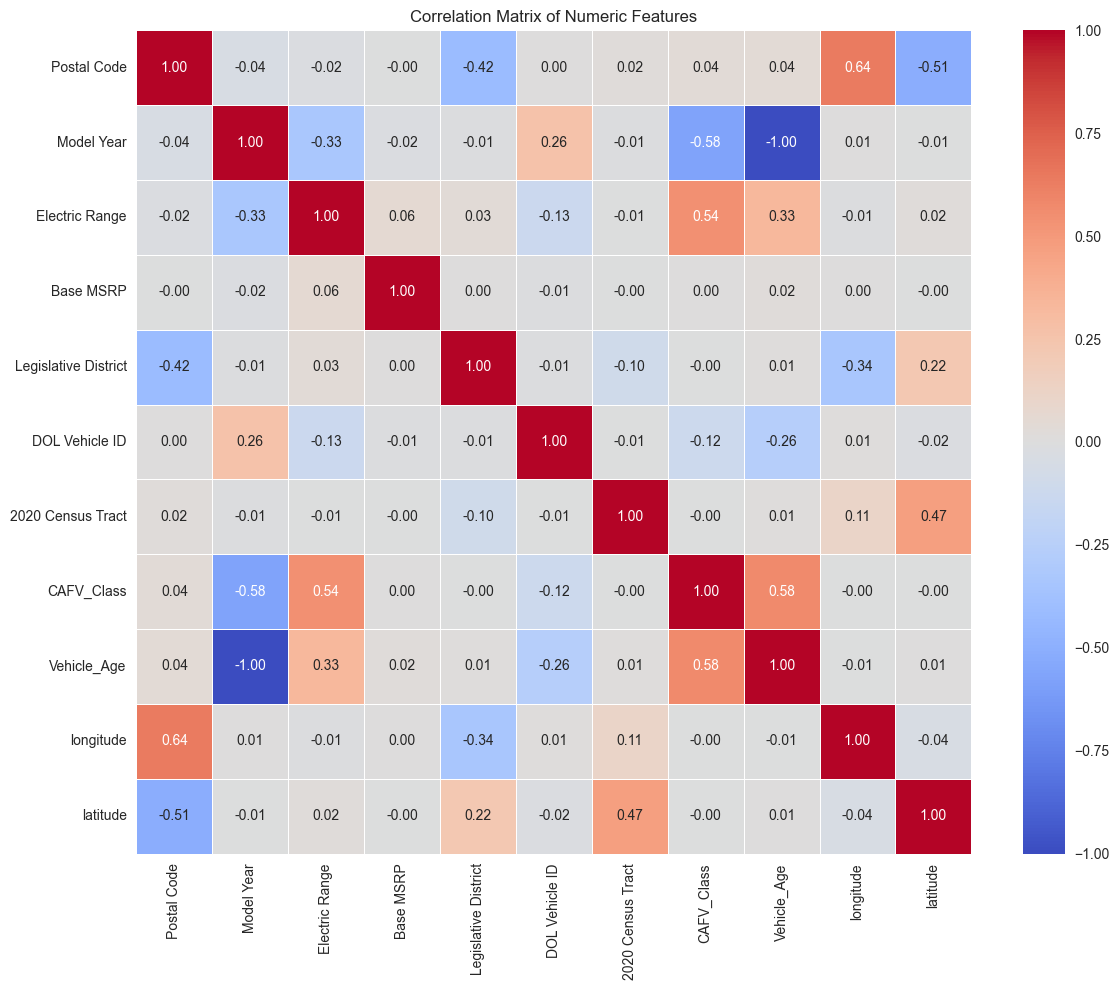

In [28]:
data_path = '../data/Electric_Vehicle_Population_Data_cleaned.parquet'
df = pd.read_parquet(data_path)

import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(12, 10))
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()